# 01_eda.ipynb

# Step 1: Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                                       

# Step 2: Load Data


In [27]:
df_submit = pd.read_csv("../data/submit.csv")
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

# Step 3: Explore Data Structure


In [28]:
print("Columns of Submit Data:")
print(df_submit.columns)
print("\nColumns of Test Data:")
print(df_test.columns)
print("\nColumns of Train Data:")
print(df_train.columns)

Columns of Submit Data:
Index(['id', 'label'], dtype='object')

Columns of Test Data:
Index(['id', 'title', 'author', 'text'], dtype='object')

Columns of Train Data:
Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


# Step 4: Check Data Info


In [29]:
print("\nTrain Data Info:")
print(df_train.info())
print("\nTest Data Info:")
print(df_test.info())
print("\nSubmit Data Info:")
print(df_submit.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
None

Submit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ----

# Step 5: Check Missing Values


In [30]:
print("\nMissing Values in Train Data:")
print(df_train.isnull().sum())
print("\nMissing Values in Test Data:")
print(df_test.isnull().sum())
print("\nMissing Values in Submit Data:")
print(df_submit.isnull().sum())


Missing Values in Train Data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64

Missing Values in Test Data:
id          0
title     122
author    503
text        7
dtype: int64

Missing Values in Submit Data:
id       0
label    0
dtype: int64


# Visualize Missing Values


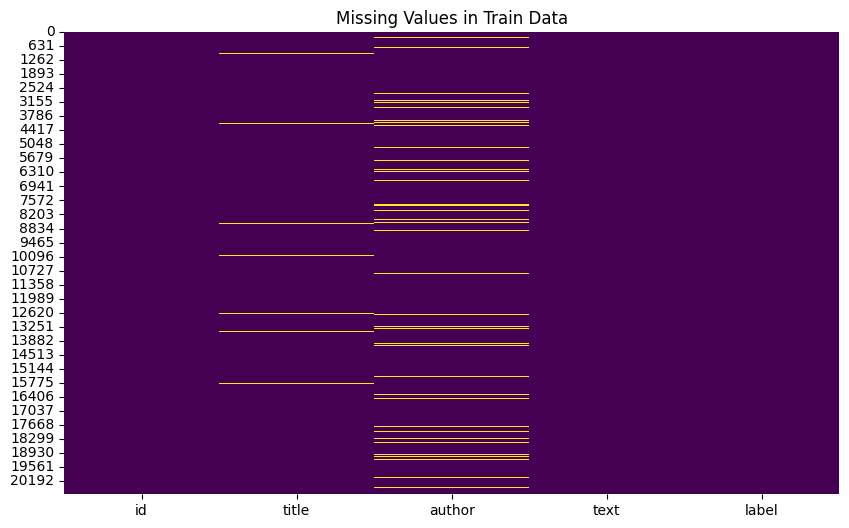

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Train Data")
plt.savefig('../reports/missing_values_train.png')
plt.show()

# Step 6: Distribution of Labels



Distribution of Labels:
label
1    10413
0    10387
Name: count, dtype: int64


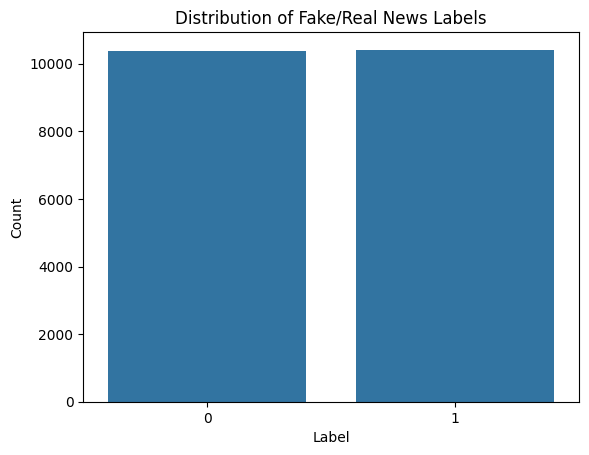

In [32]:
label_counts = df_train['label'].value_counts()
print("\nDistribution of Labels:")
print(label_counts)
sns.countplot(x='label', data=df_train)
plt.title('Distribution of Fake/Real News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('../reports/label_distribution.png')
plt.show()

# Step 7: Explore Length of Texts


In [33]:
df_train['text_length'] = df_train['text'].dropna().apply(len)

# Plot distribution of text length


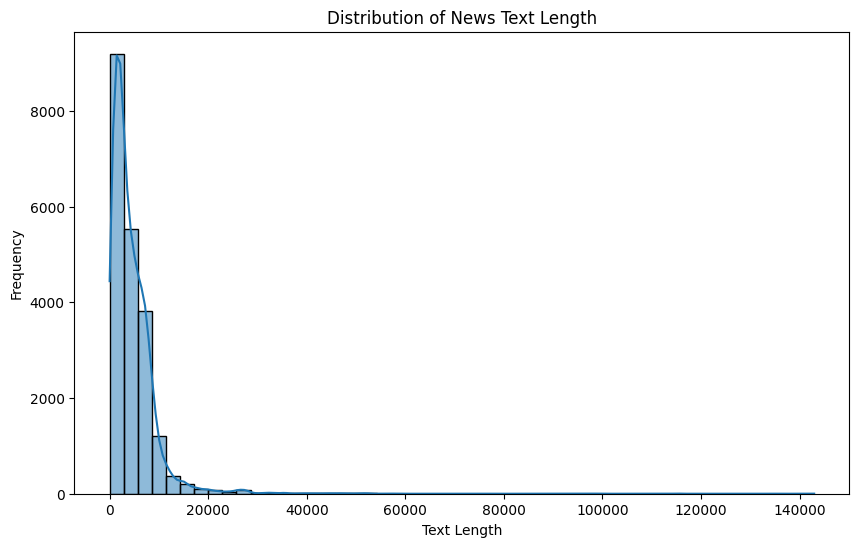

In [34]:
df_train['text_length'] = df_train['text'].dropna().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['text_length'], bins=50, kde=True)
plt.title("Distribution of News Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.savefig('../reports/text_length_distribution.png')
plt.show()

# Step 8: Explore Authors


In [35]:
author_counts = df_train['author'].value_counts().head(10)
print("\nTop 10 Authors with Most Articles:")
print(author_counts)


Top 10 Authors with Most Articles:
author
Pam Key                243
admin                  193
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
Name: count, dtype: int64


# Save EDA report

In [36]:
with open('../reports/eda_report.md', 'w') as f:
    f.write("# Exploratory Data Analysis Report\n\n")
    f.write("## Distribution of Labels\n")
    f.write(label_counts.to_string())
    f.write("\n\n## Top 10 Authors\n")
    f.write(author_counts.to_string())
    f.write("\n\n## Description of Text Length\n")
    f.write(df_train['text_length'].describe().to_string())

print("\nEDA report and visualizations have been saved to the reports folder.")


EDA report and visualizations have been saved to the reports folder.
